<a href="https://colab.research.google.com/github/jycontrol/ClassRIS/blob/main/RootLocus01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 근궤적법 예제 1

Python Control Systems Library의 설치와 이용방법은 다음 사이트 방문하시기 바랍니다.


https://python-control.readthedocs.io/

pip를 이용하여 Python Control Systems Library을 설치합니다.


In [1]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.3 MB/s eta 0:00:00


본격적으로 Control Library를 사용하기 위한 필수 피키지와 라이브러리을 import 합니다.

본 예제에서는 matlab에서 사용되는 명령어를 적용하기 위해 control.matlab 모듈을 이용합니다. 자체적인 함수들도 있으니 참조 바랍니다.

In [2]:
import matplotlib.pyplot as plt  # MATLAB plotting functions
import numpy as np
import control
from control.matlab import *

예제 (Ogata, Morden Control Engineering에서 발췌)


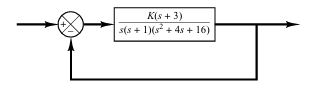

개루프 전달함수를 다항식으로 표현해야하는 데 1차와 2차 인수의 곱으로 구성되어 있습니다. 이를 $s$의 다항식으로 표시해야 합니다. python의 경우 numpy.convolve를 이용하여 구할 수 있습니다.

다음과 같이 정의하도록 합니다.

$a = s(s + 1)$

$b = s^2 + 4s + 16$

그리고 두 다항식의 convolution을 구합니다.

In [4]:
a = [1, 1, 0]
b = [1, 4, 16]
c = np.convolve(a, b)

In [5]:
c

array([ 1,  5, 20, 16,  0])

위 결과는 두 다항식의 곱이

$s^4 + 5s^3 + 20s^2 + 16s$  이 됨을 의미합니다.

즉 개루프 전달함수의 특성방정식은 다음과 같습니다.

$s^4 + 5s^3 + 20s^2 + 16s = 0$

이제, 이 다항식의 근 즉 극점을 구해봅니다.

In [6]:
r = np.roots(c)

roots()는 근을 구하는 함수로 matlab에서도 동일한 명령어가 사용됩니다.

In [7]:
r

array([-2.+3.46410162j, -2.-3.46410162j, -1.+0.j        ,  0.+0.j        ])

위 결과는 주어진 다항식의 근이 총 네개 임을 보여줍니다.

$-2.0000 \pm j3.4641$, -1, 0

따라서 주어진 개루프 시스템의 영점과 극점은 다음과 같습니다.

개루프 영점: $s = -3$

개루프 극점: $-2.0000 \pm j3.4641$, -1, 0


다음은 위 정보를 토대로 근궤적선도를 그려보겠습니다.

/usr/local/lib/python3.11/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


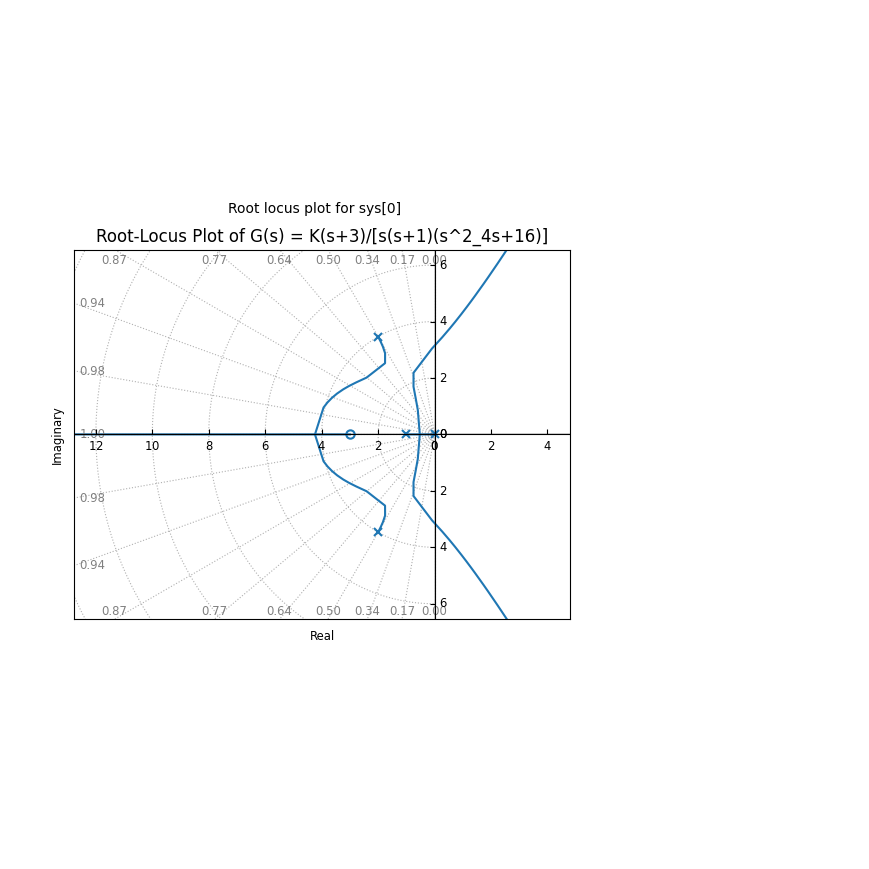

In [8]:
#Program 1

num = [1, 3]
den = [ 1,  5, 20, 16,  0]
G = control.tf(num, den)
plt.figure(1)
control.matlab.rlocus(G)
plt.title("Root-Locus Plot of G(s) = K(s+3)/[s(s+1)(s^2_4s+16)]")
plt.show()


위 그래프에서 방사형으로 나타난 점선은 끝에 나타나 있는 숫자 만큼의 감쇠비$(\zeta)$를 의미합니다. 즉 허수축 자체는 $\zeta = 0$, 그리고 실수축으로 갈수를 점점 커지다가 실수축과 겹치는 선이 $\zeta = 1$ 되는 구역입니다..